In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from transformers import AutoImageProcessor, AutoModel

repo_id = "creative-graphic-design/ISNet-general-use"

processor = AutoImageProcessor.from_pretrained(
    repo_id,
    trust_remote_code=True,
)
model = AutoModel.from_pretrained(
    repo_id,
    trust_remote_code=True,
)

/root/.pyenv/versions/3.10.14/envs/isnet/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [3]:
processor

ISNetImageProcessor {
  "auto_map": {
    "AutoImageProcessor": "creative-graphic-design/ISNet-general-use--image_processing_isnet.ISNetImageProcessor"
  },
  "image_processor_type": "ISNetImageProcessor",
  "model_in_size": [
    1024,
    1024
  ]
}

In [4]:
model

ISNetModel(
  (conv_in): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (pool_in): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
  (stage1): RSU7(
    (rebnconvin): REBNCONV(
      (conv_s1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (rebnconv1): REBNCONV(
      (conv_s1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): ReLU(inplace=True)
    )
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (rebnconv2): REBNCONV(
      (conv_s1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu_s1): R

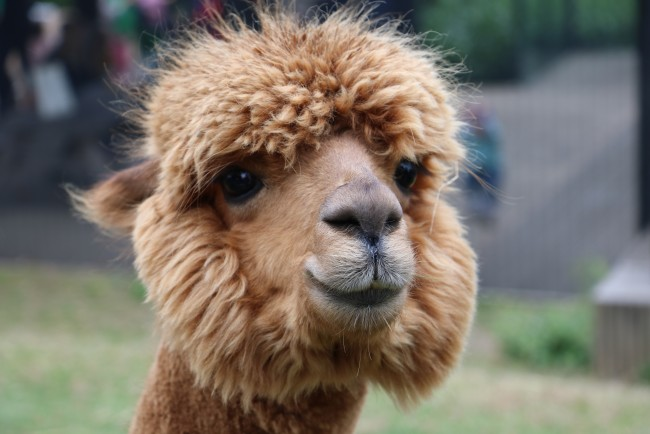

In [5]:
import requests
from PIL import Image

image = Image.open(
    requests.get(
        "https://raw.githubusercontent.com/xuebinqin/BASNet/master/test_data/test_images/0003.jpg",
        stream=True,
    ).raw
)
image

In [6]:
width, height = image.size
inputs = processor(images=image)
inputs

{'pixel_values': tensor([[[[-0.4490, -0.4472, -0.4458,  ..., -0.4141, -0.4137, -0.4137],
          [-0.4490, -0.4472, -0.4457,  ..., -0.4141, -0.4137, -0.4137],
          [-0.4490, -0.4472, -0.4454,  ..., -0.4141, -0.4137, -0.4137],
          ...,
          [ 0.0137,  0.0137,  0.0141,  ...,  0.1402,  0.1414,  0.1414],
          [ 0.0137,  0.0137,  0.0141,  ...,  0.1387,  0.1397,  0.1397],
          [ 0.0137,  0.0137,  0.0141,  ...,  0.1382,  0.1392,  0.1392]],

         [[-0.3000, -0.3035, -0.3089,  ..., -0.3866, -0.3863, -0.3863],
          [-0.3000, -0.3035, -0.3089,  ..., -0.3866, -0.3863, -0.3863],
          [-0.3000, -0.3035, -0.3091,  ..., -0.3866, -0.3863, -0.3863],
          ...,
          [ 0.1118,  0.1118,  0.1124,  ...,  0.1765,  0.1767,  0.1767],
          [ 0.1118,  0.1118,  0.1124,  ...,  0.1750,  0.1750,  0.1750],
          [ 0.1118,  0.1118,  0.1124,  ...,  0.1745,  0.1745,  0.1745]],

         [[-0.2961, -0.2979, -0.3010,  ..., -0.3481, -0.3471, -0.3471],
          [-0

In [7]:
model = model.to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

In [8]:
with torch.no_grad():
    outputs = model(**inputs, return_dict=True)

prediction = outputs.activated.d1
assert list(prediction.shape) == [1, 1, 1024, 1024]

/root/.pyenv/versions/3.10.14/envs/isnet/lib/python3.10/site-packages/torch/nn/functional.py:3809: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


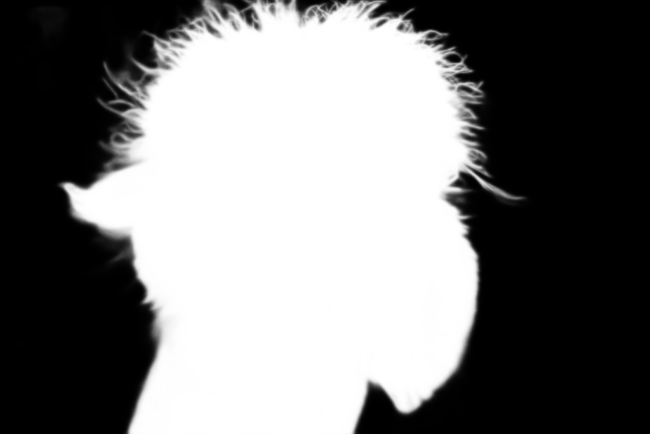

In [9]:
image = processor.postprocess(prediction, width=width, height=height)
image

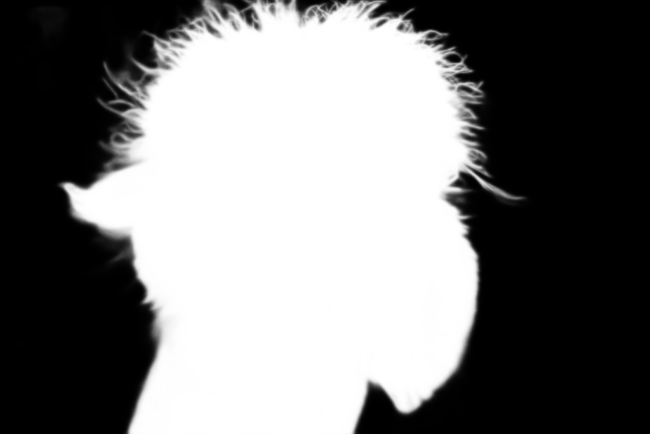

In [10]:
with torch.no_grad():
    outputs = model(**inputs, return_dict=False)

prediction = outputs[0][0]
assert list(prediction.shape) == [1, 1, 1024, 1024]

image = processor.postprocess(prediction, width=width, height=height)
image